In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tqdm import tqdm
import cv2

plt.rcParams['figure.figsize'] = [20, 5]

(570, 750, 3)


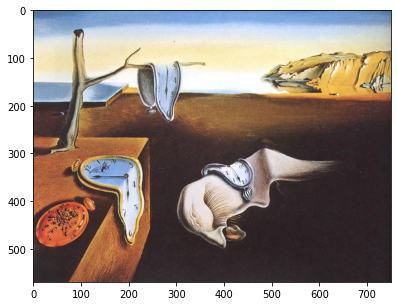

In [6]:
img = plt.imread('the-persistence-of-memory.jpg')
print(img.shape)
plt.imshow(img)

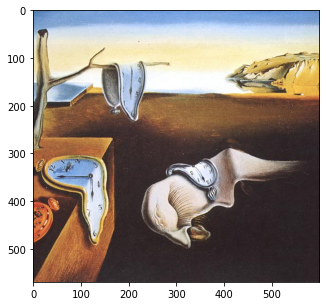

In [14]:
cropped = img[:,75:-75]
plt.imsave('cropped.png', cropped)
plt.imshow(cropped)

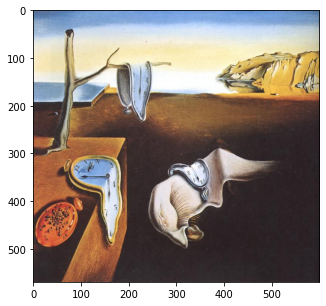

In [15]:
resized = cv2.resize(img, dsize=(img.shape[1]-150, img.shape[0]))
plt.imsave('resized.png', resized)
plt.imshow(resized)

In [87]:
filter_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]]).T

filter_y = np.array([[-1, -2, -1], 
                     [ 0,  0,  0], 
                     [ 1,  2,  1]]).T

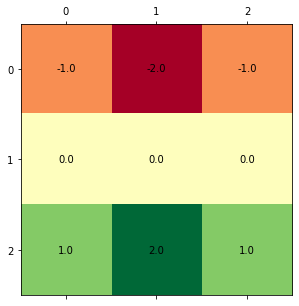

In [88]:
fig, ax = plt.subplots()
ax.matshow(filter_x, cmap='RdYlGn')
for (i, j), z in np.ndenumerate(filter_x):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.savefig('images/sobel_x')
plt.show()

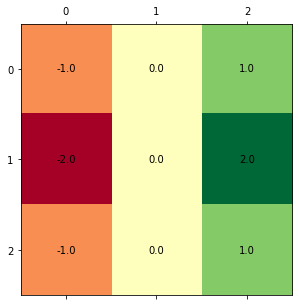

In [89]:
fig, ax = plt.subplots()
ax.matshow(filter_y, cmap='RdYlGn')
for (i, j), z in np.ndenumerate(filter_y):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.savefig('images/sobel_y')
plt.show()

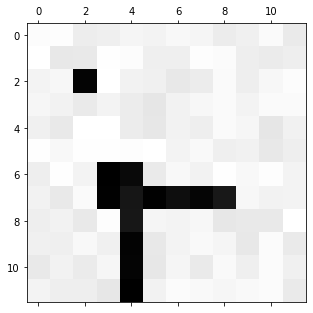

In [102]:
small_fig = np.random.uniform(0.9, 1, size=(12,12))

pts = [(2,2), (6,3), (6,4), (7,3), (7,4), (8,4), (9,4), (10,4), (11,4), (7,5), (7,6), (7,7), (7,8)]

for r, c in pts:
    small_fig[r,c] -= 0.9
    # small_fig[c,r] -= 0.9
    
plt.matshow(small_fig, cmap='gray')
plt.savefig('images/demo/small_fig')

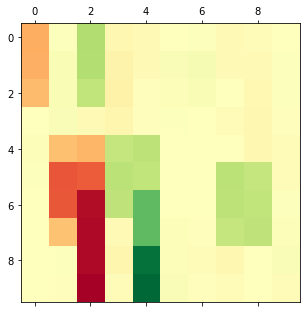

In [103]:
kx = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
ky = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
conv_x = convolve2d(small_fig, kx, mode='valid')
conv_y = convolve2d(small_fig, ky, mode='valid')

plt.matshow(conv_x, cmap='RdYlGn')
plt.savefig('images/demo/full_x')


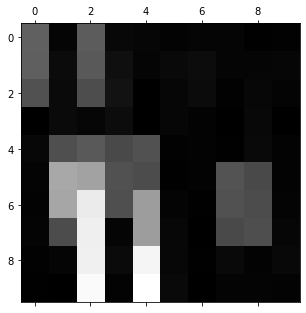

In [104]:
abs_conv_x = np.abs(conv_x)
plt.matshow(abs_conv_x, cmap='gray')
plt.savefig('images/demo/mag_x')

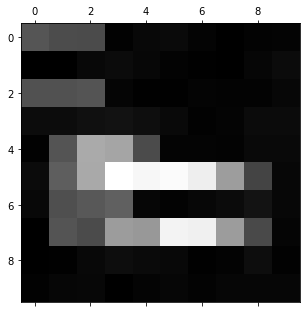

In [105]:
abs_conv_y = np.abs(conv_y)
plt.matshow(abs_conv_y, cmap='gray')
plt.savefig('images/demo/mag_y')

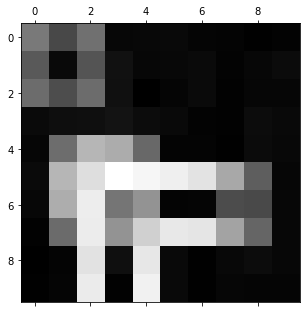

In [106]:
edges = np.sqrt(abs_conv_x**2 + abs_conv_y**2)
plt.matshow(edges, cmap='gray')
plt.savefig('images/demo/demo_edges')

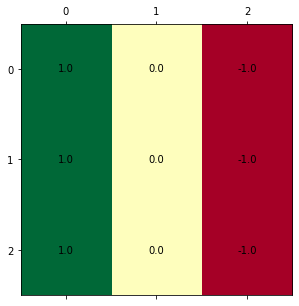

In [107]:
fig, ax = plt.subplots()
ax.matshow(kx, cmap='RdYlGn')
for (i, j), z in np.ndenumerate(kx):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.savefig('images/demo/kx')
plt.show()

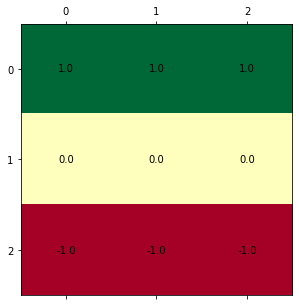

In [108]:
fig, ax = plt.subplots()
ax.matshow(ky, cmap='RdYlGn')
for (i, j), z in np.ndenumerate(ky):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.savefig('images/demo/ky')
plt.show()